# Gerekli Kütüphaneler

In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics

seed = 42
np.random.seed(seed)
random.seed(seed)

# Veri Seti

In [2]:
X, _ = make_moons(n_samples=300, noise=0.05)

# Spectral Clustering

In [4]:
class SpectralClustering:
    def __init__(self, n_clusters=2, sigma=1.0):
        # Kume sayisi
        self.n_clusters = n_clusters
        # Sigma
        self.sigma = sigma

    def fit(self, X):
        # Agirlik matrisi olusturulur
        pairwise_sq_dists = cdist(X, X, "sqeuclidean")
        W = np.exp(-pairwise_sq_dists / (2 * self.sigma ** 2))
        np.fill_diagonal(W, 0)


        # Derece matrisi olusturulur
        D = np.diag(np.sum(W, axis=1))

        # Laplace matrisi olusturulur
        L = D - W

        # Laplace matrisnin ozdeger ve ozvektorleri hesaplanir
        eigenvalues, eigenvectors = np.linalg.eigh(L)

        # En kucuk n_clusters ozdegere karsilik gelen ozvektorler secilir
        idx = np.argsort(eigenvalues)[:self.n_clusters]
        H = eigenvectors[:, idx]

        # Secilen ozvektorler normallestirilir
        H_normalized = normalize(H, norm="l2", axis=1)

        # KMeans ile kumeler belirlenir
        kmeans = KMeans(n_clusters=self.n_clusters)
        self.labels_ = kmeans.fit_predict(H)
        return self

    def predict(self, X):
        return self.labels_

# Eğitim

In [5]:
sc = SpectralClustering(n_clusters=2, sigma=1.0)
sc.fit(X)

# Sonuçlar

In [6]:
labels = sc.labels_

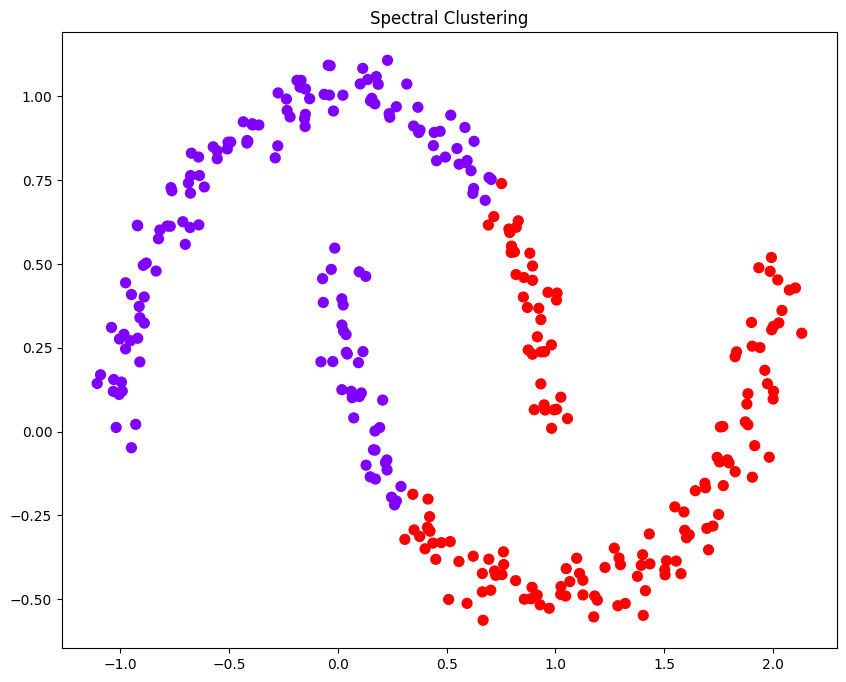

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow", s=50)
plt.title("Spectral Clustering")
plt.show()